In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/viaNNation/Churrasco/main/planejamento_viagem%20-%20Página1.csv")
df

,espetos,quantidade,preço,preço final
0,carne,70,"R$ 2,59","R$ 181,30"
1,frango,35,"R$ 2,19","R$ 76,65"
2,linguiça,25,"R$ 2,19","R$ 54,75"
3,coração,50,"R$ 2,39","R$ 119,50"
4,linguiça p,10,"R$ 2,19","R$ 21,90"
5,lombo,0,"R$ 2,19","R$ 0,00"
6,kafta,0,"R$ 2,39","R$ 0,00"
7,queijo,3,"R$ 23,00","R$ 69,00"
8,pão de alho,5,"R$ 13,99","R$ 69,95"


In [3]:
#retirando as linhas que temos 0 espetos
df = df.drop([5, 6], axis=0)
df

,espetos,quantidade,preço,preço final
0,carne,70,"R$ 2,59","R$ 181,30"
1,frango,35,"R$ 2,19","R$ 76,65"
2,linguiça,25,"R$ 2,19","R$ 54,75"
3,coração,50,"R$ 2,39","R$ 119,50"
4,linguiça p,10,"R$ 2,19","R$ 21,90"
7,queijo,3,"R$ 23,00","R$ 69,00"
8,pão de alho,5,"R$ 13,99","R$ 69,95"


## A partir de aqui estarei trabalhando os dados do data frame para transformar as colunas 'preço' e 'preço final' em float, pois náo será possível realizar operações matemáticas


In [4]:
df['preço final'] = df['preço final'].str.replace('R$', '')

In [5]:
df['preço final'] = df['preço final'].str.replace(',', '.')

In [6]:
df['preço final'] = df['preço final'].astype(float)

In [7]:
df['preço'] = df['preço'].str.replace(',', '.')
df['preço'] = df['preço'].str.replace('R$', '')
df['preço'] = df['preço'].astype(float)

In [8]:
df

,espetos,quantidade,preço,preço final
0,carne,70,2.59,181.30
1,frango,35,2.19,76.65
2,linguiça,25,2.19,54.75
3,coração,50,2.39,119.50
4,linguiça p,10,2.19,21.90
7,queijo,3,23.00,69.00
8,pão de alho,5,13.99,69.95


## corrigindo a quantidade e preço por unidade de queijo e pão de alho (estavam com unidade/preço por pacote, e não por espeto)

In [9]:
#localizando as linhas do queijo e do pão de alho para corrigir as quantidades e preço unitário
queijo_index = df[df['espetos'] == 'queijo'].index[0]
pao_index = df[df['espetos'] == 'pão de alho'].index[0]

# Alterar as quantidades e preços
df.loc[queijo_index, 'quantidade'] = 21
df.loc[queijo_index, 'preço'] = 3.28
df.loc[pao_index, 'quantidade'] = 25
df.loc[pao_index, 'preço'] = 2.80

## A partir de aqui estaremos vendo quais os produtos mais caros e mais baratos da nossa lista

In [10]:
df[df["preço"] == df["preço"].max()]

,espetos,quantidade,preço,preço final
7,queijo,21,3.28,69.0


In [11]:
df[df["preço"] == df["preço"].min()]

,espetos,quantidade,preço,preço final
1,frango,35,2.19,76.65
2,linguiça,25,2.19,54.75
4,linguiça p,10,2.19,21.90


## Vamos calcular o valor a ser pago por cada um dos participantes da viagem

In [12]:
df["preço final"].sum()/15

39.53666666666667

## Aqui estamos calculando a quantidade de itens que estão sendo comprados, e quantos itens teremos por pessoa

In [13]:
df["quantidade"].sum()

236

In [14]:
df["quantidade"].sum()/16

14.75

## Aqui estamos plotando um gráfico de barras para visualização do custo total que está sendo pago por espeto

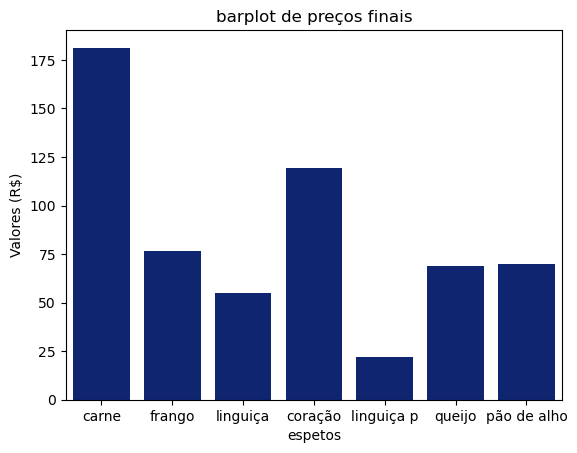

In [24]:
sns.barplot(x='espetos', y='preço final', data=df)
plt.title('barplot de preços finais')
plt.ylabel('Valores (R$)')
sns.set_palette("dark")
plt.show()

## plotando um gráfico para vermos a proporção de espetos que estão sendo adquiridas

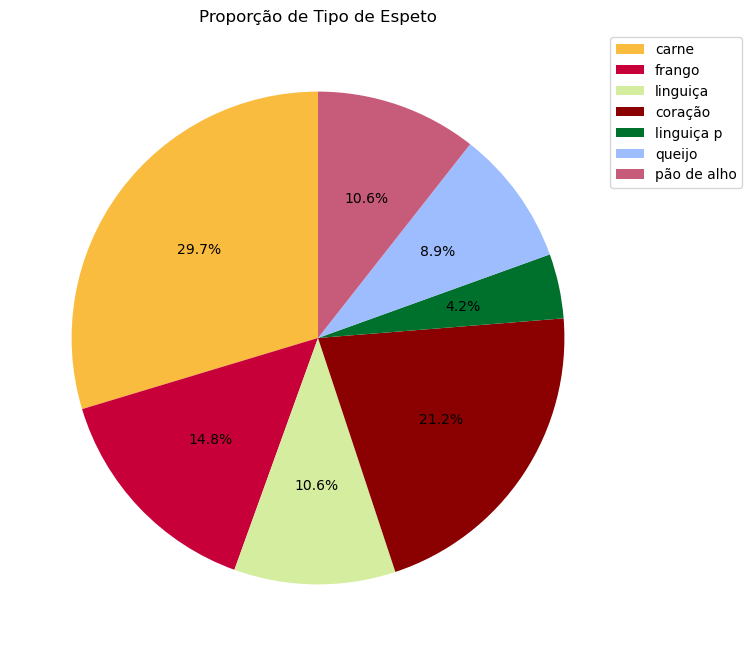

In [33]:
labels = df["espetos"]
sizes = df["quantidade"]
colors = ['#FABC3F', '#C70039', '#D5ED9F', 'darkred', '#00712D', '#9DBDFF', '#C75B7A']
plt.figure(figsize=(12, 8), dpi=100)

plt.pie(sizes, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Proporção de Tipo de Espeto')

# Adicionar a legenda no canto superior direito e associar às cores
plt.legend(labels, loc='upper right', bbox_to_anchor=(1.2, 1))

plt.show()